In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,En la hacienda,1922
1,Unruhige Nacht,1958
2,Dissonance (II),2008
3,Self Intervention,2010
4,Ate,2008


In [4]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [22]:
c = cast
c = c[(c.character == 'Superman') | (c.character == 'Batman')]
c = c.groupby(['year', 'character']).size()
c = c.unstack(1).fillna(0)
len(c[c['Superman'] > c['Batman']])

11

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [23]:
c = cast
c = c[(c.character == 'Superman') | (c.character == 'Batman')]
c = c.groupby(['year', 'character']).size()
c = c.unstack(1).fillna(0)
len(c[c['Superman'] < c['Batman']])

27

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

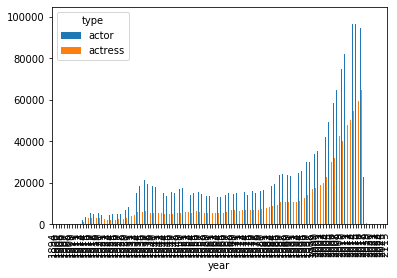

In [36]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack(1).fillna(0)
c.plot(kind='bar')

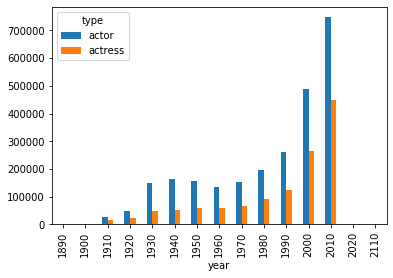

In [37]:
c = cast
c = c.groupby([c.year // 10 * 10, 'type']).size()
c = c.unstack(1).fillna(0)
c.plot(kind='bar')

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

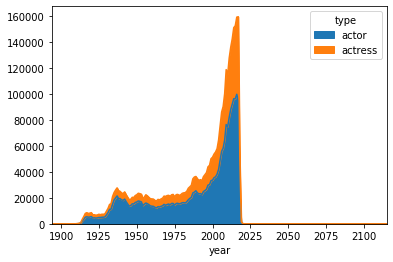

In [38]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack(1).fillna(0)
c.plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

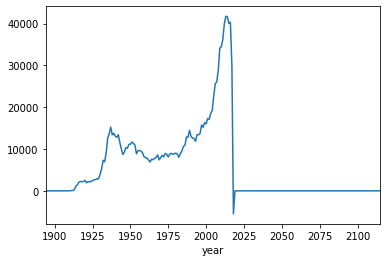

In [52]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack(1).fillna(0)
c = c.actor - c.actress
c.plot()

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

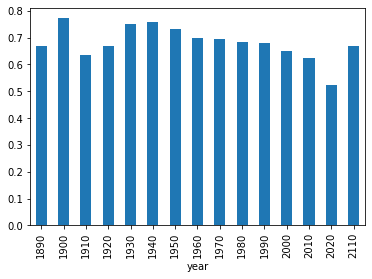

In [65]:
c = cast
c = c.groupby([c.year // 10 * 10, 'type']).size()
c = c.unstack(1).fillna(0)
c = c.actor / (c.actor + c.actress)
c.plot(kind='bar')

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

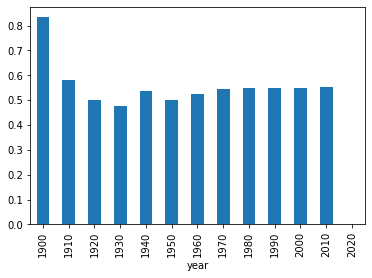

In [68]:
c = cast
c = c[c.n == 2]
c = c.groupby([c.year // 10 * 10, 'type']).size()
c = c.unstack(1).fillna(0)
c = c.actor / (c.actor + c.actress)
c.plot(kind='bar')

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

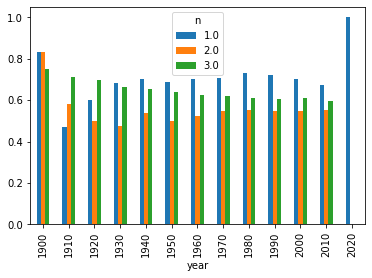

In [85]:
c = cast
c = c[(c.n >= 1) & (c.n <= 3)]
c = c.groupby([c.year // 10 * 10, 'type', 'n']).size()
c = c.unstack(1).fillna(0)
c = c.actor / (c.actor + c.actress)
c = c.unstack(1).fillna(0)
c.plot(kind='bar')